In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymc import sampling_jax

/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-LzaSaxBQ-py3.10/lib/python3.10/site-packages/pymc/sampling/jax.py:39: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:
%config InlineBackend.figure_format = 'retina'

rng = np.random.default_rng(8927)
az.style.use('arviz-darkgrid')

In [3]:
alpha, sigma = 1, 1
beta = [1, 2.5]

size = 100

X1 = rng.normal(size=size)
X2 = rng.normal(size=size)

Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

Text(0.5, 0, 'X2')

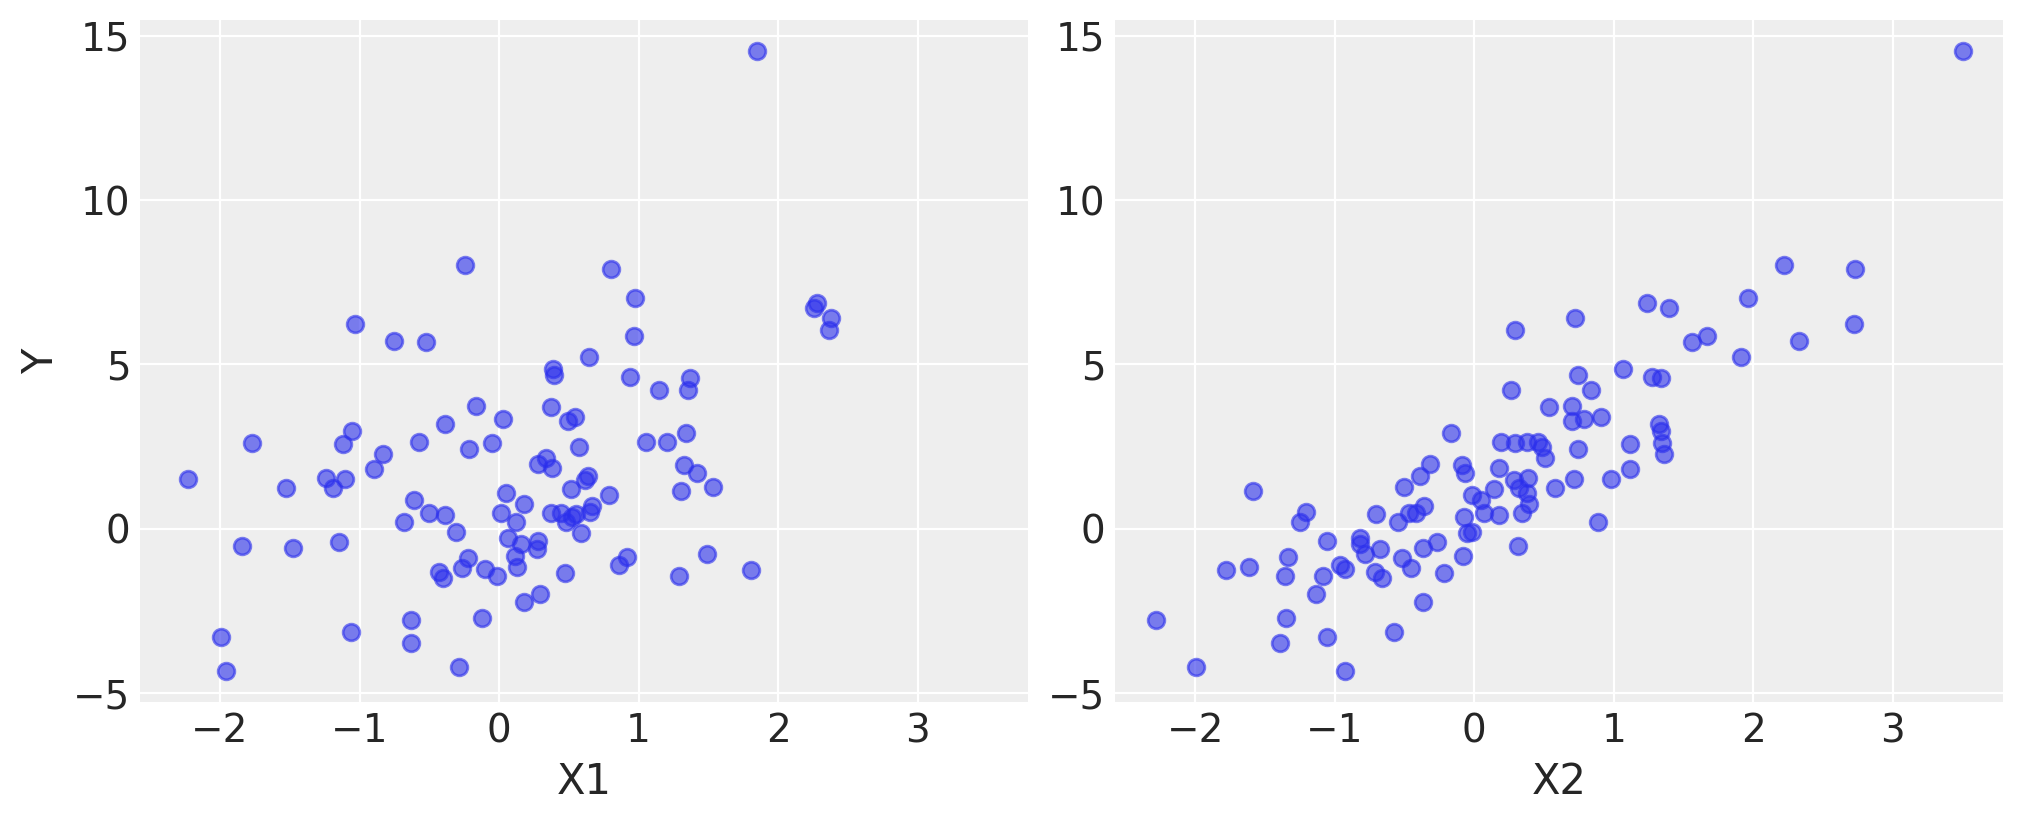

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True,)
axes[0].scatter(X1, Y, alpha=0.6)
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Y")
axes[1].scatter(X2, Y, alpha=0.6)
axes[1].set_xlabel("X2")

In [5]:
import pymc as pm
pm.__version__

'5.0.2'

In [6]:
basic_model = pm.Model()

with basic_model:
    
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [7]:
with basic_model:
    
    idata = sampling_jax.sample_numpyro_nuts(chains=4, draws=10000, tune=1000)

Compiling...


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Compilation time =  0:00:01.084542
Sampling...


  0%|          | 0/11000 [00:00<?, ?it/s]

  0%|          | 0/11000 [00:00<?, ?it/s]

  0%|          | 0/11000 [00:00<?, ?it/s]

  0%|          | 0/11000 [00:00<?, ?it/s]

Sampling time =  0:00:03.002514
Transforming variables...
Transformation time =  0:00:00.020034


array([[<AxesSubplot: title={'center': 'alpha'}>,
        <AxesSubplot: title={'center': 'alpha'}>],
       [<AxesSubplot: title={'center': 'beta'}>,
        <AxesSubplot: title={'center': 'beta'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

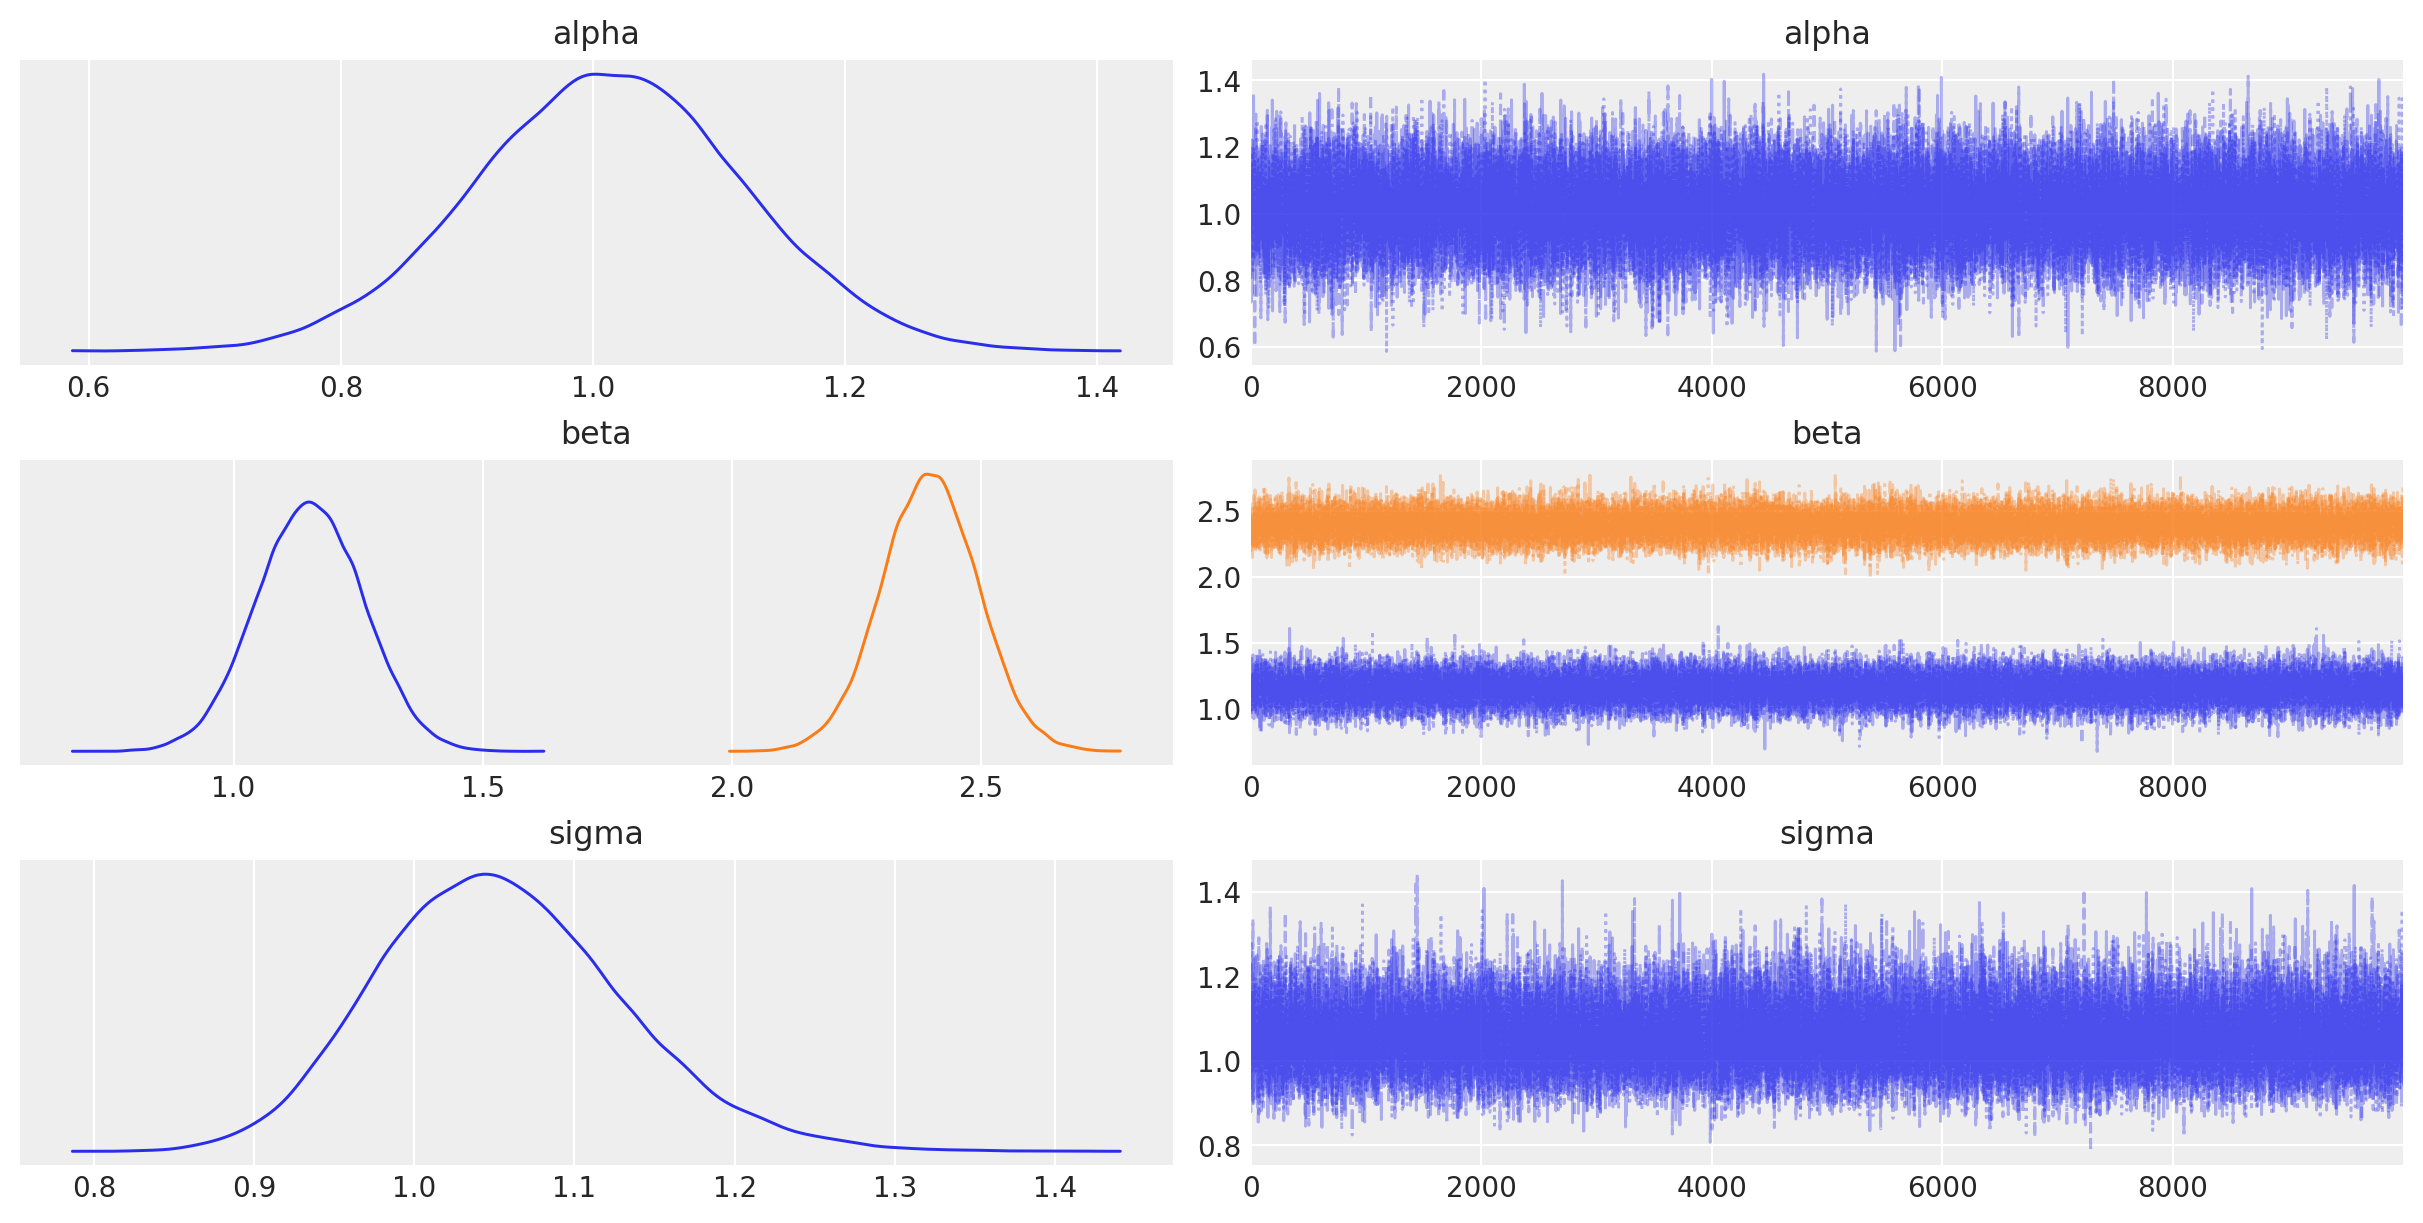

In [8]:
az.plot_trace(idata, combined=True)

In [9]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.01,0.11,0.81,1.22,0.0,0.0,40708.05,31462.28,1.0
beta[0],1.15,0.11,0.95,1.35,0.0,0.0,37921.61,30259.16,1.0
beta[1],2.40,0.10,2.21,2.58,0.0,0.0,43474.39,31505.36,1.0
sigma,1.06,0.08,0.92,1.20,0.0,0.0,41946.56,31171.18,1.0
